In [1]:
#First collect the data
import datetime as d
import pandas as pd
import numpy as np #numerical python: used for scientific notation
import seaborn as sns # statistical ploting
import matplotlib.pyplot as plt
import math
# to run in jupyter. Now we will get the plot even if we 
# don't use show()
%matplotlib inline 

sns.set(style="darkgrid")
equipment_data = pd.read_csv("TCF_data.csv")
equipment_data.head(10) # gives first 10 entries

,VISN,Facility Name,Service,EIL,Asset#,Equipment Category,Manufacturer,Model#,Use Status,Location,Acquisition,Replacement,Asset Value
0,16,(564) VHSO,BIOMED,136,1109188,TESTERS: INFUSION PUMP,BIO TEK MEDICAL,IDA,OPERATING,1120-02,1-Sep-93,1-Sep-03,3875.00
1,16,(564) VHSO,SURGERY,234,1114898,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,110-03,18-Feb-15,18-Feb-25,449.00
2,16,(564) VHSO,SURGERY,235,1224812,TESTERS: INFUSION PUMP,Hewlett-Packard USA,6730B,OPERATING,1111-02,25-Jan-10,25-Jan-13,2025.00
3,16,(564) VHSO,SURGERY,235,1228865,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,239-01,18-Feb-15,18-Feb-25,449.00
4,16,(564) VHSO,SURGERY,235,1187299,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,239-01,18-Feb-15,18-Feb-25,449.00
5,16,(564) VHSO,SURGERY,235,1118129,INFUSION PUMPS: ENTERAL FEEDING,KANGURU SOLUTIONS,EPUMP,OPERATING,3B333-01,10-Dec-14,10-Dec-24,500.00
6,16,(564) VHSO,SURGERY,236,1197550,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,323A-01,18-Feb-15,18-Feb-25,449.00
7,16,(564) VHSO,SURGERY,422,1657463,INFUSION PUMPS: ANALGESIC: PATIENT-CONTROLLED,CareFusion Alaris,ALARIS PCA MODULE 8120,OPERATING,239-01,20-Nov-17,20-Nov-25,3307.02
8,16,(564) VHSO,NURSING SERVICE,421,1657464,INFUSION PUMPS: ANALGESIC: PATIENT-CONTROLLED,CareFusion Alaris,ALARIS PCA MODULE 8120,OPERATING,005-46,20-Nov-17,20-Nov-25,3307.02
9,16,(564) VHSO,NURSING SERVICE,421,1657465,INFUSION PUMPS: ANALGESIC: PATIENT-CONTROLLED,CareFusion Alaris,ALARIS PCA MODULE 8120,OPERATING,239-01,20-Nov-17,20-Nov-25,3307.02


In [2]:
import time as t

x = d.datetime.now()
y = d.datetime(1991,8,6)
print(x)
print(y)

2020-04-27 17:35:11.022171
1991-08-06 00:00:00


In [3]:
#change up the panda fram

aquisition_dates = []
def change_date(date):
    date_nums = date.split("-")
    month = t.strptime(date_nums[1],'%b').tm_mon
    year = t.strptime(date_nums[2],'%y').tm_year
    return d.datetime(year,month,int(date_nums[0]))


equipment_data.Acquisition= equipment_data.Acquisition.map(change_date)
equipment_data.Replacement= equipment_data.Replacement.map(change_date)
equipment_data.head(10)






# for date in equipment_data.Acquisition:
#     date_nums= date.split('-')
#     month = t.strptime(date_nums[1],'%b').tm_mon ## get the month number
#     year =  t.strptime(date_nums[2],'%y').tm_year
#     print(year)
#     ##new_date = d.datetime(date_nums[2],date_nums[])
#     ##print(new_date)



,VISN,Facility Name,Service,EIL,Asset#,Equipment Category,Manufacturer,Model#,Use Status,Location,Acquisition,Replacement,Asset Value
0,16,(564) VHSO,BIOMED,136,1109188,TESTERS: INFUSION PUMP,BIO TEK MEDICAL,IDA,OPERATING,1120-02,1993-09-01,2003-09-01,3875.00
1,16,(564) VHSO,SURGERY,234,1114898,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,110-03,2015-02-18,2025-02-18,449.00
2,16,(564) VHSO,SURGERY,235,1224812,TESTERS: INFUSION PUMP,Hewlett-Packard USA,6730B,OPERATING,1111-02,2010-01-25,2013-01-25,2025.00
3,16,(564) VHSO,SURGERY,235,1228865,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,239-01,2015-02-18,2025-02-18,449.00
4,16,(564) VHSO,SURGERY,235,1187299,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,239-01,2015-02-18,2025-02-18,449.00
5,16,(564) VHSO,SURGERY,235,1118129,INFUSION PUMPS: ENTERAL FEEDING,KANGURU SOLUTIONS,EPUMP,OPERATING,3B333-01,2014-12-10,2024-12-10,500.00
6,16,(564) VHSO,SURGERY,236,1197550,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,323A-01,2015-02-18,2025-02-18,449.00
7,16,(564) VHSO,SURGERY,422,1657463,INFUSION PUMPS: ANALGESIC: PATIENT-CONTROLLED,CareFusion Alaris,ALARIS PCA MODULE 8120,OPERATING,239-01,2017-11-20,2025-11-20,3307.02
8,16,(564) VHSO,NURSING SERVICE,421,1657464,INFUSION PUMPS: ANALGESIC: PATIENT-CONTROLLED,CareFusion Alaris,ALARIS PCA MODULE 8120,OPERATING,005-46,2017-11-20,2025-11-20,3307.02
9,16,(564) VHSO,NURSING SERVICE,421,1657465,INFUSION PUMPS: ANALGESIC: PATIENT-CONTROLLED,CareFusion Alaris,ALARIS PCA MODULE 8120,OPERATING,239-01,2017-11-20,2025-11-20,3307.02


In [4]:
today = d.datetime.now()
print(today)
print(today - y)

2020-04-27 17:35:11.070779
10492 days, 17:35:11.070779


In [5]:
### add a new column to see how big of a gap the data has
Acquisition_dates = equipment_data.Acquisition
Replacement_dates = equipment_data.Replacement
difference = Replacement_dates-Acquisition_dates

equipment_data['Years Between'] = difference.dt.days
equipment_data['Years Between'] = equipment_data['Years Between'].apply(lambda x: x/365)
equipment_data.head(10)





,VISN,Facility Name,Service,EIL,Asset#,Equipment Category,Manufacturer,Model#,Use Status,Location,Acquisition,Replacement,Asset Value,Years Between
0,16,(564) VHSO,BIOMED,136,1109188,TESTERS: INFUSION PUMP,BIO TEK MEDICAL,IDA,OPERATING,1120-02,1993-09-01,2003-09-01,3875.00,10.005479
1,16,(564) VHSO,SURGERY,234,1114898,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,110-03,2015-02-18,2025-02-18,449.00,10.008219
2,16,(564) VHSO,SURGERY,235,1224812,TESTERS: INFUSION PUMP,Hewlett-Packard USA,6730B,OPERATING,1111-02,2010-01-25,2013-01-25,2025.00,3.002740
3,16,(564) VHSO,SURGERY,235,1228865,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,239-01,2015-02-18,2025-02-18,449.00,10.008219
4,16,(564) VHSO,SURGERY,235,1187299,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,239-01,2015-02-18,2025-02-18,449.00,10.008219
5,16,(564) VHSO,SURGERY,235,1118129,INFUSION PUMPS: ENTERAL FEEDING,KANGURU SOLUTIONS,EPUMP,OPERATING,3B333-01,2014-12-10,2024-12-10,500.00,10.008219
6,16,(564) VHSO,SURGERY,236,1197550,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,323A-01,2015-02-18,2025-02-18,449.00,10.008219
7,16,(564) VHSO,SURGERY,422,1657463,INFUSION PUMPS: ANALGESIC: PATIENT-CONTROLLED,CareFusion Alaris,ALARIS PCA MODULE 8120,OPERATING,239-01,2017-11-20,2025-11-20,3307.02,8.005479
8,16,(564) VHSO,NURSING SERVICE,421,1657464,INFUSION PUMPS: ANALGESIC: PATIENT-CONTROLLED,CareFusion Alaris,ALARIS PCA MODULE 8120,OPERATING,005-46,2017-11-20,2025-11-20,3307.02,8.005479
9,16,(564) VHSO,NURSING SERVICE,421,1657465,INFUSION PUMPS: ANALGESIC: PATIENT-CONTROLLED,CareFusion Alaris,ALARIS PCA MODULE 8120,OPERATING,239-01,2017-11-20,2025-11-20,3307.02,8.005479


In [6]:
# now let's see how close to the date it is

today = today = d.datetime.now()
replacement_day_away_from_today = Replacement_dates.apply(lambda x: x - today)

equipment_data['Years until replacement'] = replacement_day_away_from_today.dt.days
equipment_data['Years until replacement'] = equipment_data['Years until replacement'].apply(lambda x: x/365)

equipment_data.head(10)



,VISN,Facility Name,Service,EIL,Asset#,Equipment Category,Manufacturer,Model#,Use Status,Location,Acquisition,Replacement,Asset Value,Years Between,Years until replacement
0,16,(564) VHSO,BIOMED,136,1109188,TESTERS: INFUSION PUMP,BIO TEK MEDICAL,IDA,OPERATING,1120-02,1993-09-01,2003-09-01,3875.00,10.005479,-16.668493
1,16,(564) VHSO,SURGERY,234,1114898,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,110-03,2015-02-18,2025-02-18,449.00,10.008219,4.813699
2,16,(564) VHSO,SURGERY,235,1224812,TESTERS: INFUSION PUMP,Hewlett-Packard USA,6730B,OPERATING,1111-02,2010-01-25,2013-01-25,2025.00,3.002740,-7.260274
3,16,(564) VHSO,SURGERY,235,1228865,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,239-01,2015-02-18,2025-02-18,449.00,10.008219,4.813699
4,16,(564) VHSO,SURGERY,235,1187299,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,239-01,2015-02-18,2025-02-18,449.00,10.008219,4.813699
5,16,(564) VHSO,SURGERY,235,1118129,INFUSION PUMPS: ENTERAL FEEDING,KANGURU SOLUTIONS,EPUMP,OPERATING,3B333-01,2014-12-10,2024-12-10,500.00,10.008219,4.621918
6,16,(564) VHSO,SURGERY,236,1197550,INFUSION PUMPS: ENTERAL FEEDING,TYCO HEALTHCARE / KENDALL,KANGAROO PUMP,OPERATING,323A-01,2015-02-18,2025-02-18,449.00,10.008219,4.813699
7,16,(564) VHSO,SURGERY,422,1657463,INFUSION PUMPS: ANALGESIC: PATIENT-CONTROLLED,CareFusion Alaris,ALARIS PCA MODULE 8120,OPERATING,239-01,2017-11-20,2025-11-20,3307.02,8.005479,5.567123
8,16,(564) VHSO,NURSING SERVICE,421,1657464,INFUSION PUMPS: ANALGESIC: PATIENT-CONTROLLED,CareFusion Alaris,ALARIS PCA MODULE 8120,OPERATING,005-46,2017-11-20,2025-11-20,3307.02,8.005479,5.567123
9,16,(564) VHSO,NURSING SERVICE,421,1657465,INFUSION PUMPS: ANALGESIC: PATIENT-CONTROLLED,CareFusion Alaris,ALARIS PCA MODULE 8120,OPERATING,239-01,2017-11-20,2025-11-20,3307.02,8.005479,5.567123


Text(0.5, 1.0, 'Average Years Until Replacement')

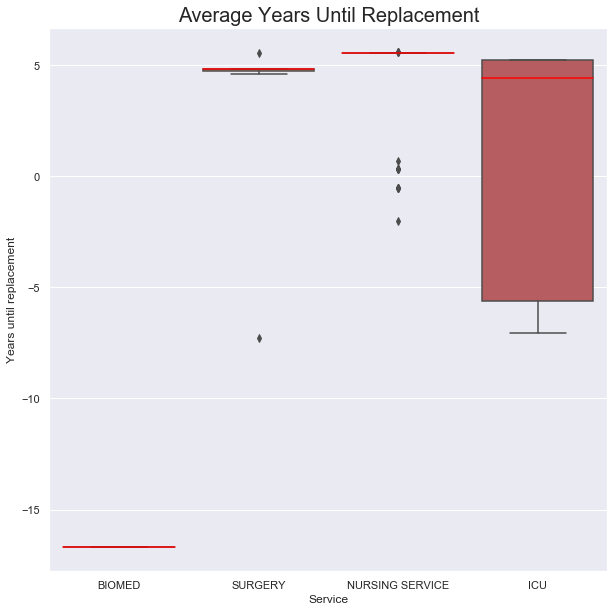

In [7]:
# Let's plot some stuff
plt.figure(figsize=(10,10))
average_years_until_replacement = sns.boxplot(x='Service', y = 'Years until replacement',medianprops={'color':'Red'}, data = equipment_data)
average_years_until_replacement.set_title("Average Years Until Replacement", fontsize=20)


[Text(0, 0, 'BIO TEK MEDICAL'),
 Text(0, 0, 'TYCO HEALTHCARE / KENDALL'),
 Text(0, 0, 'Hewlett-Packard USA'),
 Text(0, 0, 'KANGURU SOLUTIONS'),
 Text(0, 0, 'CareFusion Alaris'),
 Text(0, 0, 'CareFusion'),
 Text(0, 0, 'ALARIS, INC.'),
 Text(0, 0, 'B Braun Medical Inc'),
 Text(0, 0, 'B Braun Medical Ltd'),
 Text(0, 0, 'Smiths Medical'),
 Text(0, 0, 'Baxter International Inc')]

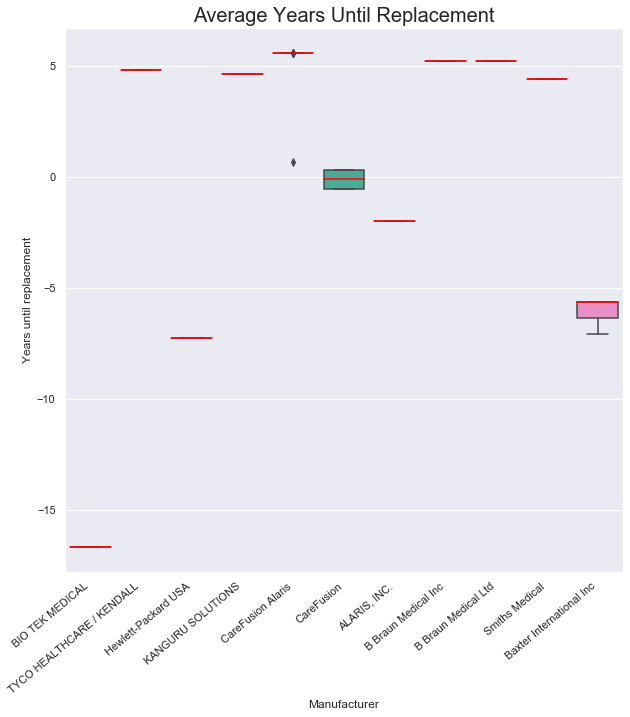

In [8]:
plt.figure(figsize=(10,10))
average_years_until_replacement = sns.boxplot(x='Manufacturer', y = 'Years until replacement',medianprops={'color':'Red'}, data = equipment_data)
average_years_until_replacement.set_title("Average Years Until Replacement", fontsize=20)
average_years_until_replacement.set_xticklabels(average_years_until_replacement.get_xticklabels(), rotation=40, ha="right")

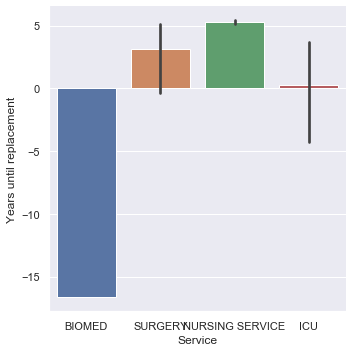

In [9]:

Average_Years_until_replacement_bar = sns.catplot(x="Service", y="Years until replacement", kind="bar", data = equipment_data)


Text(0.5, 1.0, 'Average Asset Value by Service')

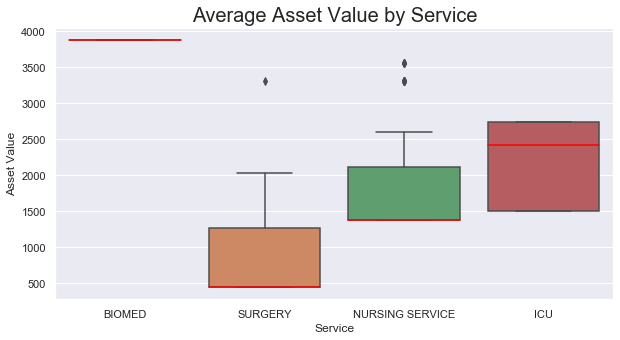

In [10]:
# Let's plot assets
plt.figure(figsize=(10,5))
average_price_for_asset = sns.boxplot(x='Service', y = "Asset Value", data = equipment_data, medianprops={'color':'Red'})
average_price_for_asset.set_title("Average Asset Value by Service", fontsize=20)

Text(0.5, 0.98, 'Average Asset Value By Service')

<Figure size 1440x360 with 0 Axes>

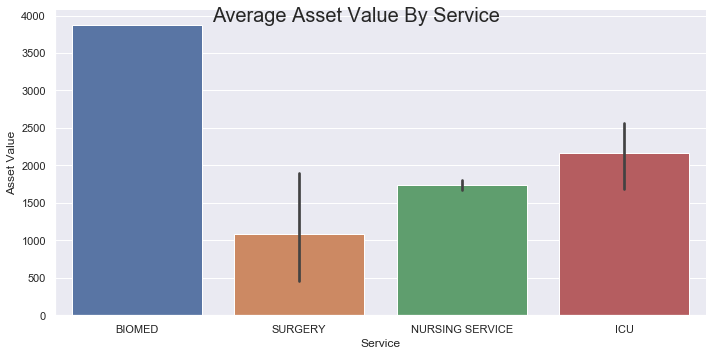

In [11]:
plt.figure(figsize=(20,5))
Average_asset_value_bar = sns.catplot(x="Service", y="Asset Value", kind="bar", data = equipment_data, aspect= 2)
Average_asset_value_bar.fig.suptitle('Average Asset Value By Service', fontsize=20) 

# Total Assets



The total asset amount for Biomed is 3875.0
The total asset amount for Surgery is 7628.02
The total asset amount for Nursing services is 426800.61
The total asset amount for the ICU is 15148.880000000001


Text(0, 0.5, 'Total Asset Amount ($)')

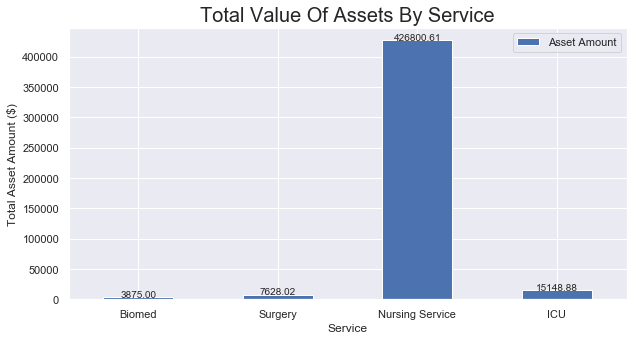

In [12]:
#total assests
Biomed_total_assets = equipment_data.groupby(['Service','Asset Value'])["Asset Value"].sum()
Biomed_total_assets = equipment_data['Asset Value'][equipment_data['Service'] == 'BIOMED'].sum()
print("The total asset amount for Biomed is " + str(Biomed_total_assets))

Surgery_total_assets = equipment_data['Asset Value'][equipment_data['Service'] == 'SURGERY'].sum()
print("The total asset amount for Surgery is " + str(Surgery_total_assets))
Nursing_total_assets = equipment_data['Asset Value'][equipment_data['Service'] == 'NURSING SERVICE'].sum()
print("The total asset amount for Nursing services is " + str(Nursing_total_assets) )
ICU_total_assets = equipment_data['Asset Value'][equipment_data['Service'] == 'ICU'].sum()
print("The total asset amount for the ICU is " + str(ICU_total_assets))

asset_data = {
        'Service' : ["Biomed","Surgery", "Nursing Service", "ICU"],
        'Asset Amount': [Biomed_total_assets,Surgery_total_assets, Nursing_total_assets, ICU_total_assets]}

asset_df = pd.DataFrame(data= asset_data)


total_asset_graph = asset_df.plot.bar(x="Service", y="Asset Amount", rot=0, figsize=(10,5))
for p in total_asset_graph.patches:
        height = p.get_height()
        total_asset_graph.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center")
total_asset_graph.set_title("Total Value Of Assets By Service", fontsize=20)
total_asset_graph.set_xlabel("Service")
total_asset_graph.set_ylabel("Total Asset Amount ($)")




In [13]:
## Device by value
# graphs by year


In [14]:
# stuff to analyze
# if something is needing to be replaced, what will most likely need to be replaced and what service is it in
#average time for next replacement
#what is the average replacement time
#How do we figure what needs to be replace the quickest and where the budget goes. I need to figure something that takes
# into account the asset value and then the time needing to be replaced. time/asset value. You also need to take into 
# account how long something last. 







The average asset value for Nursing Service assets is 1734.9618292682965
The average asset value for Surgery assets is :1089.717142857143
the average asset value for Biomed assets:3875.0
the average asset value for ICU assets:2164.1257142857144


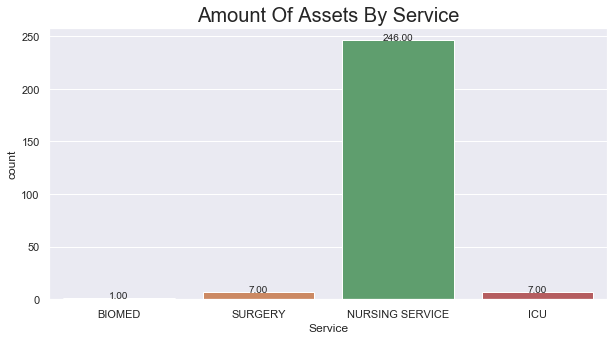

In [15]:
# let's make a countplot
plt.figure(figsize=(10,5))
ax = sns.countplot(x="Service", data = equipment_data)
ax.set_title("Amount Of Assets By Service", fontsize=20)
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center")

# what is the average asset value for each thing
Nursing_assets_average = equipment_data['Asset Value'][equipment_data['Service'] == 'NURSING SERVICE'].mean()
print("The average asset value for Nursing Service assets is " + str(Nursing_assets_average) )
Surgery_assets_average = equipment_data['Asset Value'][equipment_data['Service'] == 'SURGERY'].mean()
print("The average asset value for Surgery assets is :" + str(Surgery_assets_average ))
Biomed_assets_average = equipment_data['Asset Value'][equipment_data['Service'] == 'BIOMED'].mean()
print("the average asset value for Biomed assets:" + str(Biomed_assets_average) )
ICU_assets_average = equipment_data['Asset Value'][equipment_data['Service'] == 'ICU'].mean()
print("the average asset value for ICU assets:" + str(ICU_assets_average) )

# Who is our biggest manufacturer


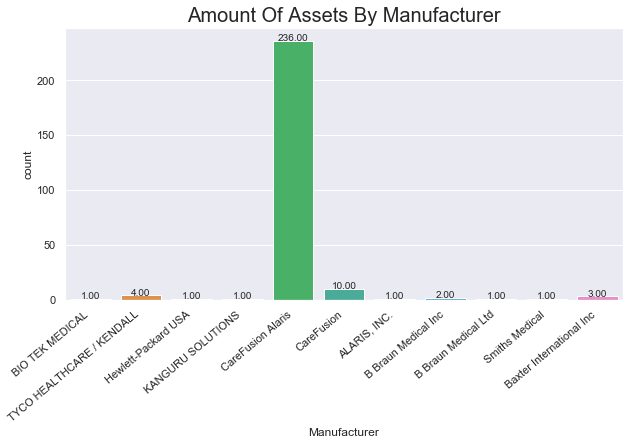

In [16]:
plt.figure(figsize=(10,5))
manufacturer_ax = sns.countplot(x="Manufacturer", data = equipment_data)
manufacturer_ax .set_title("Amount Of Assets By Manufacturer", fontsize=20)
manufacturer_ax.set_xticklabels(manufacturer_ax.get_xticklabels(), rotation=40, ha="right")
for p in manufacturer_ax .patches:
        height = p.get_height()
        manufacturer_ax .text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center")

# What is our biggest model


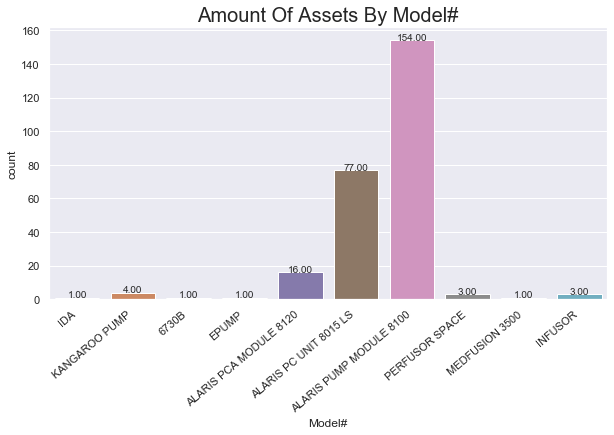

In [17]:
plt.figure(figsize=(10,5))
model_ax = sns.countplot(x="Model#", data = equipment_data)
model_ax .set_title("Amount Of Assets By Model#", fontsize=20)
model_ax.set_xticklabels(model_ax.get_xticklabels(), rotation=40, ha="right")
for p in model_ax.patches:
        height = p.get_height()
        model_ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center")

The average time for Nursing Service assets is 5.285599732709658
The average time value for Surgery assets is :3.16908023483366
the average time value for Biomed assets:-16.66849315068493
the average time value for ICU assets:0.24540117416829751


Text(0, 0.5, 'Frequency')

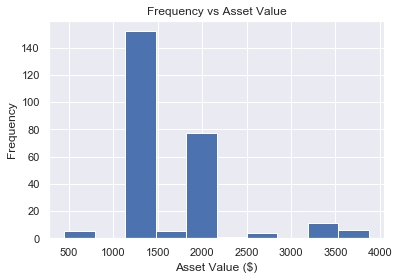

In [18]:
# find the average time until next replacement
# you need to optimize how long something lasts and how much money to budget. 
Nursing_RT_average = equipment_data['Years until replacement'][equipment_data['Service'] == 'NURSING SERVICE'].mean()
print("The average time for Nursing Service assets is " + str(Nursing_RT_average) )

Surgery_RT_average = equipment_data['Years until replacement'][equipment_data['Service'] == 'SURGERY'].mean()
print("The average time value for Surgery assets is :" + str(Surgery_RT_average ))
Biomed_RT_average = equipment_data['Years until replacement'][equipment_data['Service'] == 'BIOMED'].mean()
print("the average time value for Biomed assets:" + str(Biomed_RT_average) )
ICU_RT_average = equipment_data['Years until replacement'][equipment_data['Service'] == 'ICU'].mean()
print("the average time value for ICU assets:" + str(ICU_RT_average) )


asset_value_graph = equipment_data["Asset Value"].plot.hist(title = "Frequency vs Asset Value")

asset_value_graph.set_xlabel("Asset Value ($)")
asset_value_graph.set_ylabel("Frequency")




In [19]:
# a big problem is that our nursing service is really large, in about five years everything will need to be replaced. 
# This seems like it will be a huge problem

#what needs to be replace right now (how much will this be) (which groups will be most impacted)
#what needs to be be replaced in a year (how much will this be)

#What groups have precedence over each other (is the ICU assets needed more than other peoples assets needed more than others)

#What is the breakdown of certain equiment we need

# graph will the breakdown of in the negative and positive


# Equipment That Needs To be Replaced

In [20]:
# find what equipment needs to be replaced
# How much in total will it cost
# What is the breakdown for each of the services
# What stuff should we buy to replace those things

In [21]:
#What equipment needs to be replace
#What stuff needs to be replace right now
Needs_to_be_replaced = equipment_data.filter(items=["Service","Equipment Category","Years until replacement"], like=None, regex=None, axis=None)['Years until replacement'] < 0
#equipment_data[Needs_to_be_replaced].head(10)

## Equipment to be replace right now

In [44]:
# function for computing the values for a certain year



def year_replacement_cost(min, max, asset_df, replacement_year,title):
    Needs_to_be_replaced = equipment_data[(equipment_data['Years until replacement'] > min ) &
                                    (equipment_data['Years until replacement'] <= max)]
    

    total_cost_of_replacements = Needs_to_be_replaced["Asset Value"].sum()
    yearly_values = []

    # get replacement costs for this year
    for service in equipment_data['Service'].unique():
        total_cost_of_replacements = Needs_to_be_replaced["Asset Value"][Needs_to_be_replaced['Service'] == service].sum()
        yearly_values.append(total_cost_of_replacements)
        print("The total cost for the service " + service + " is " +  str(total_cost_of_replacements))
      
    #total amount that needs to be replaced
    total_amount_to_replace = sum(yearly_values)
    print("Total amount that needs to be replaced is " + str(total_amount_to_replace))

    # make a new column in the asset_df function
    asset_df[replacement_year]  = yearly_values  
    
    # print a bar graph
    total_asset_graph = asset_df.plot.bar( rot=0, figsize=(10,5))
    total_asset_graph.set_title(title, fontsize=20)
    total_asset_graph.set_xlabel("Service")
    total_asset_graph.set_ylabel("Total Asset Amount ($)")
    plt.tight_layout()
    return yearly_values

    
def Replace_by_Equipment_category(min,max,title):
    Needs_to_be_replaced = equipment_data[(equipment_data['Years until replacement'] > min ) &
                                    (equipment_data['Years until replacement'] <= max)]
    print("There are " + str(Needs_to_be_replaced.shape[0])+ " items that need to be replaced.")
    plt.figure(figsize=(10,10)) # this creates a figure 8 inch wide, 4 inch high
    ax = sns.countplot(x="Equipment Category", data=Needs_to_be_replaced )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    ax.set_title(title,fontsize=20)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 
    plt.tight_layout()
    
def Replace_by_Service(min,max,title):
    Needs_to_be_replaced = equipment_data[(equipment_data['Years until replacement'] > min ) &
                                    (equipment_data['Years until replacement'] <= max)]
    print("There are " + str(Needs_to_be_replaced.shape[0])+ " items that need to be replaced.")
    plt.figure(figsize=(10,10)) # this creates a figure 8 inch wide, 4 inch high
    ax = sns.countplot(x="Service", data=Needs_to_be_replaced )
    ax.set_title(title, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 
    plt.tight_layout()

def Replace_by_Model(min,max,title):
    Needs_to_be_replaced = equipment_data[(equipment_data['Years until replacement'] > min ) &
                                    (equipment_data['Years until replacement'] <= max)]
    print("There are " + str(Needs_to_be_replaced.shape[0])+ " items that need to be replaced.")
    plt.figure(figsize=(10,10)) # this creates a figure 8 inch wide, 4 inch high
    ax = sns.countplot(x="Model#", data=Needs_to_be_replaced )
    ax.set_title(title, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 
    plt.tight_layout()
    
    
def Replace_by_Man(min,max,title):
    Needs_to_be_replaced = equipment_data[(equipment_data['Years until replacement'] > min ) &
                                    (equipment_data['Years until replacement'] <= max)]
    print("There are " + str(Needs_to_be_replaced.shape[0])+ " items that need to be replaced.")
    plt.figure(figsize=(10,10)) # this creates a figure 8 inch wide, 4 inch high
    ax = sns.countplot(x="Manufacturer", data=Needs_to_be_replaced )
    ax.set_title(title, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 
    plt.tight_layout()

28432.97
The total cost for the service BIOMED is 3875.0
The total cost for the service SURGERY is 2025.0
The total cost for the service NURSING SERVICE is 18010.97
The total cost for the service ICU is 4522.0
Total amount that needs to be replaced is 28432.97


Text(0, 0.5, 'Total Asset Amount ($)')

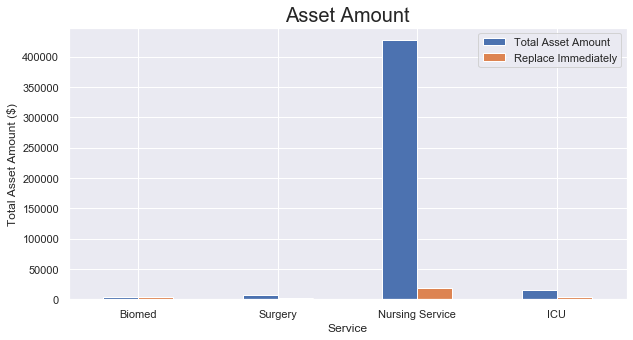

In [23]:
# How much will this cost in total
total_cost_of_replacements = equipment_data[Needs_to_be_replaced]["Asset Value"].sum()
print(total_cost_of_replacements)


index = ['Biomed',"Surgery", "Nursing Service", "ICU"]
asset_df = pd.DataFrame(index = index)
replace_now = []

for service in equipment_data['Service'].unique():
    total_cost_of_replacements = equipment_data[Needs_to_be_replaced]["Asset Value"][equipment_data['Service'] == service].sum()
    replace_now.append(total_cost_of_replacements)
    print("The total cost for the service " + service + " is " +  str(total_cost_of_replacements))

total_amount_to_replace = sum(replace_now)
print("Total amount that needs to be replaced is " + str(total_amount_to_replace))
asset_df["Total Asset Amount"] =[Biomed_total_assets,Surgery_total_assets, Nursing_total_assets, ICU_total_assets]
asset_df["Replace Immediately"] = replace_now
    

total_asset_graph = asset_df.plot.bar( rot=0,figsize=(10,5))
total_asset_graph.set_title("Asset Amount", fontsize=20)
total_asset_graph.set_xlabel("Service")
total_asset_graph.set_ylabel("Total Asset Amount ($)")



## Total amount for each group

Text(0, 0.5, 'Amount ($)')

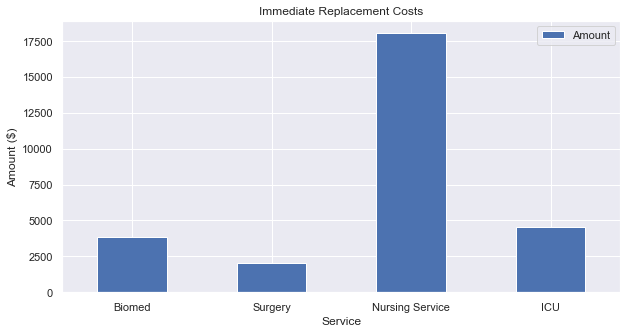

In [24]:
replace_costs = pd.DataFrame( index = index)
replace_costs["Amount"] = replace_now
replace_costs_ax = replace_costs.plot.bar( rot=0,figsize=(10,5), title="Immediate Replacement Costs")
replace_costs_ax.set_xlabel("Service");
replace_costs_ax.set_ylabel("Amount ($)")

## Type of equipment to be replaced

There are 11 items that need to be replaced.


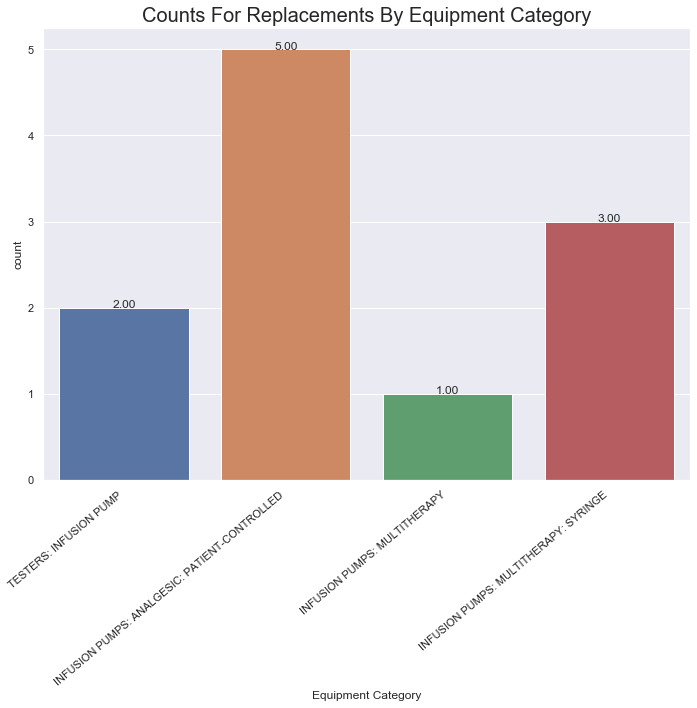

In [25]:
Needs_to_be_replaced = equipment_data[equipment_data['Years until replacement'] < 0]
sns.set(style="darkgrid")
print("There are " + str(Needs_to_be_replaced.shape[0])+ " items that need to be replaced.")
plt.figure(figsize=(10,10)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x="Equipment Category", data=Needs_to_be_replaced )
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Counts For Replacements By Equipment Category",fontsize=20)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 
    
    
plt.tight_layout()


# models that needs to be replaced

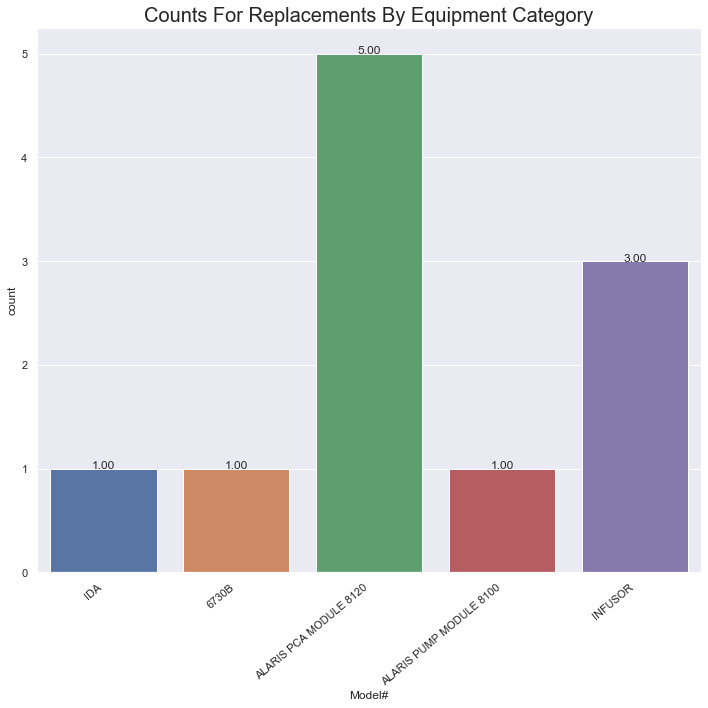

In [26]:
Needs_to_be_replaced_2 = equipment_data[equipment_data['Years until replacement'] < 0]
plt.figure(figsize=(10,10)) # this creates a figure 8 inch wide, 4 inch high
Needs_replaced_ax = sns.countplot(x="Model#", data=Needs_to_be_replaced_2 )
Needs_replaced_ax.set_xticklabels(Needs_replaced_ax.get_xticklabels(), rotation=40, ha="right")
Needs_replaced_ax.set_title("Counts For Replacements By Equipment Category",fontsize=20)

for p in Needs_replaced_ax.patches:
    height = p.get_height()
    Needs_replaced_ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 
    
    
plt.tight_layout()

## Manufacturer for items that need to be replaced immediately

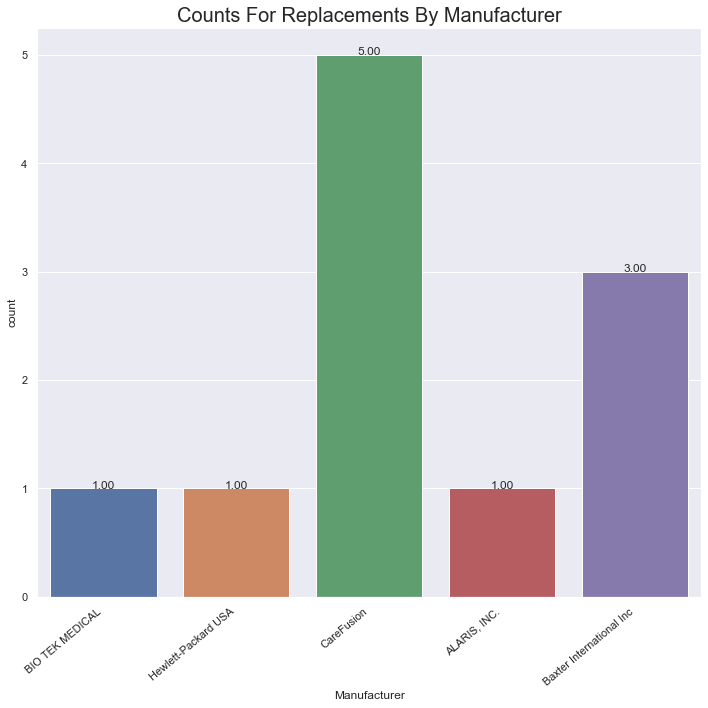

In [27]:
Needs_to_be_replaced_2 = equipment_data[equipment_data['Years until replacement'] < 0]
plt.figure(figsize=(10,10)) # this creates a figure 8 inch wide, 4 inch high
Needs_replaced_ax = sns.countplot(x="Manufacturer", data=Needs_to_be_replaced_2 )
Needs_replaced_ax.set_xticklabels(Needs_replaced_ax.get_xticklabels(), rotation=40, ha="right")
Needs_replaced_ax.set_title("Counts For Replacements By Manufacturer",fontsize=20)

for p in Needs_replaced_ax.patches:
    height = p.get_height()
    Needs_replaced_ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 
    
    
plt.tight_layout()

# Number of assets to be replaced by Service Team


There are 11 items that need to be replaced.


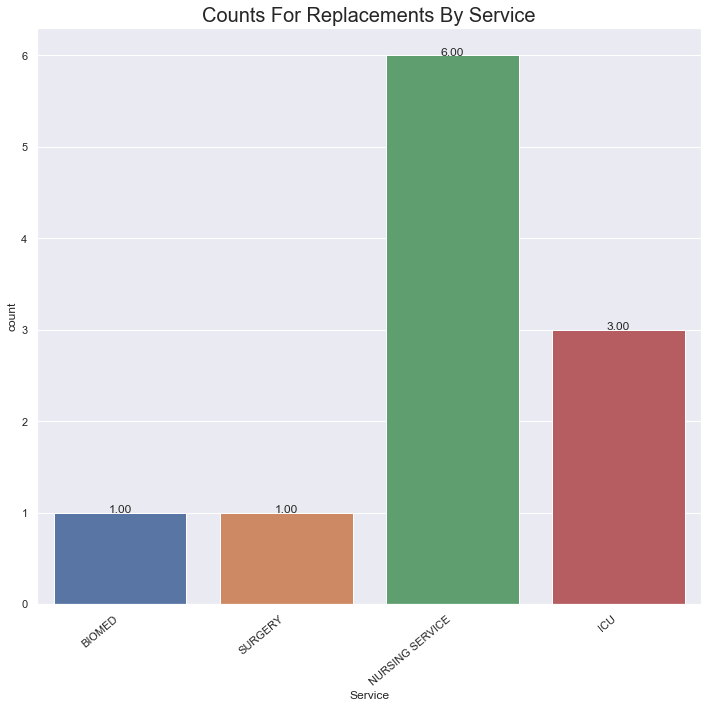

In [28]:
Needs_to_be_replaced = equipment_data[equipment_data['Years until replacement'] < 0]
sns.set(style="darkgrid")
print("There are " + str(Needs_to_be_replaced.shape[0])+ " items that need to be replaced.")
plt.figure(figsize=(10,10)) # this creates a figure 8 inch wide, 4 inch high
ax = sns.countplot(x="Service", data=Needs_to_be_replaced )
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_title("Counts For Replacements By Service", fontsize=20)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 
    
    
plt.tight_layout()

## Equipment to be replaced within a year

The total cost for the service BIOMED is 0.0
The total cost for the service SURGERY is 0.0
The total cost for the service NURSING SERVICE is 19360.920000000002
The total cost for the service ICU is 0.0
Total amount that needs to be replaced is 19360.920000000002


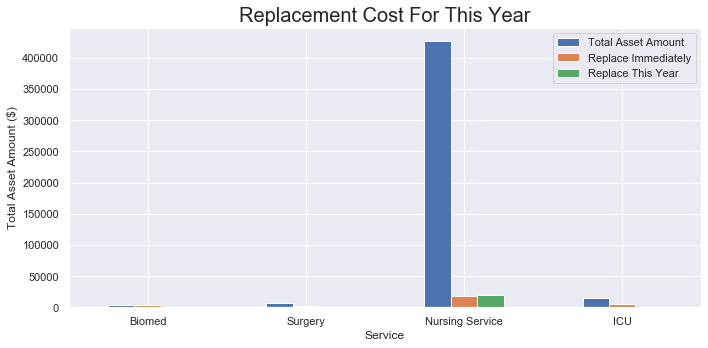

In [29]:
this_year_replacement_costs = year_replacement_cost(0, 1, asset_df, "Replace This Year", "Replacement Cost For This Year")  


47793.89


,This Year
Biomed,3875.00
Surgery,2025.00
Nursing Service,37371.89
ICU,4522.00


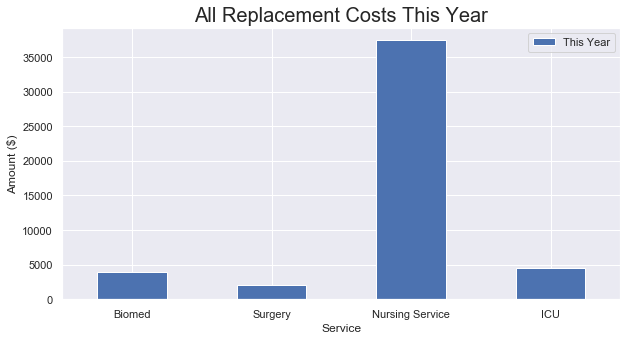

In [30]:
replace_costs_this_year = pd.DataFrame( index = index)
replace_costs_this_year["This Year"] = this_year_replacement_costs
replace_costs_this_year["This Year"] = replace_costs["Amount"] + replace_costs_this_year["This Year"]

replace_costs_this_year_ax = replace_costs_this_year.plot.bar( rot=0,figsize=(10,5))
replace_costs_this_year_ax.set_title("All Replacement Costs This Year", fontsize=20)
replace_costs_this_year_ax.set_xlabel("Service");
replace_costs_this_year_ax.set_ylabel("Amount ($)")
print(replace_costs_this_year["This Year"].sum())
replace_costs_this_year.head(10)


# graph for combining immediately and within a year

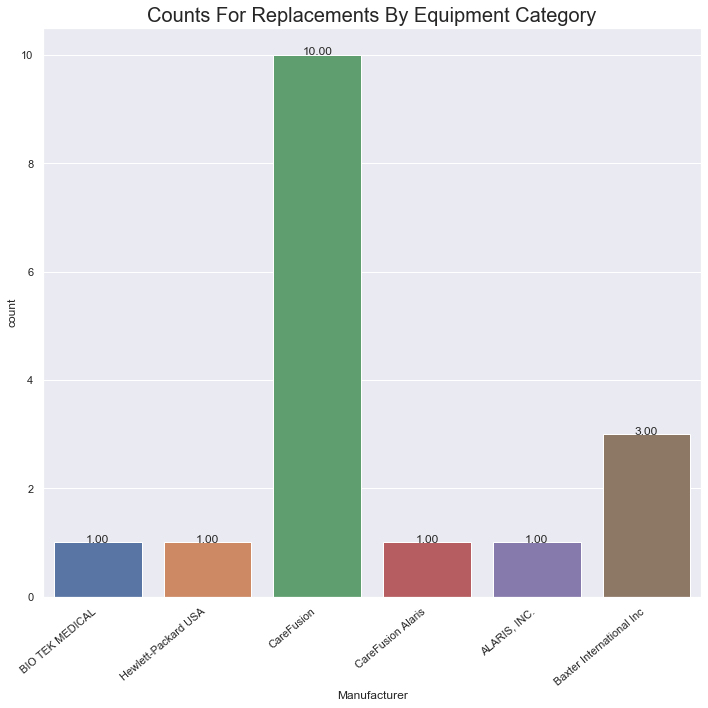

In [31]:
Needs_to_be_replaced_2 = equipment_data[(equipment_data['Years until replacement'] <= 1)]
plt.figure(figsize=(10,10)) # this creates a figure 8 inch wide, 4 inch high
Needs_replaced_ax = sns.countplot(x="Manufacturer", data=Needs_to_be_replaced_2 )
Needs_replaced_ax.set_xticklabels(Needs_replaced_ax.get_xticklabels(), rotation=40, ha="right")
Needs_replaced_ax.set_title("Counts For Replacements By Equipment Category",fontsize=20)

for p in Needs_replaced_ax.patches:
    height = p.get_height()
    Needs_replaced_ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 
    
    
plt.tight_layout()

# graph for model for year immediately and this year

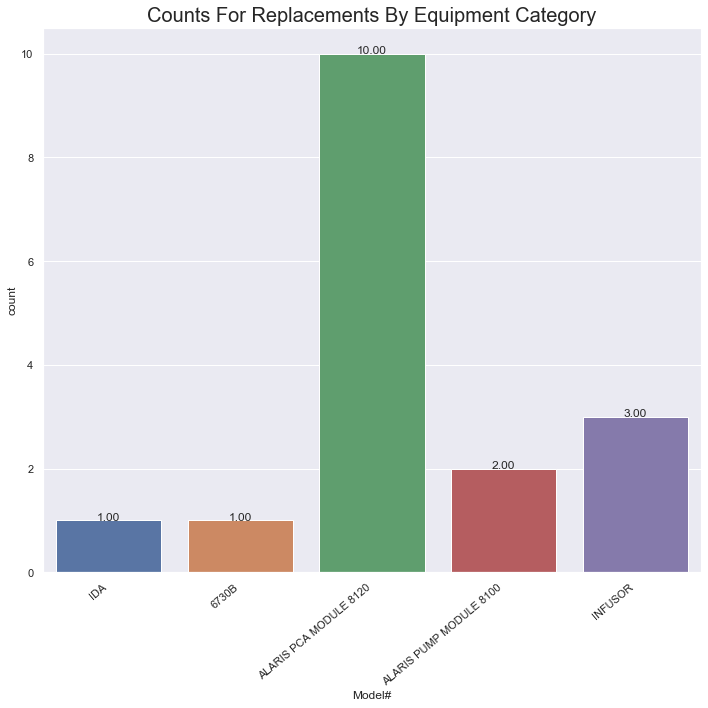

In [32]:
Needs_to_be_replaced_2 = equipment_data[(equipment_data['Years until replacement'] <= 1)]
plt.figure(figsize=(10,10)) # this creates a figure 8 inch wide, 4 inch high
Needs_replaced_ax = sns.countplot(x="Model#", data=Needs_to_be_replaced_2 )
Needs_replaced_ax.set_xticklabels(Needs_replaced_ax.get_xticklabels(), rotation=40, ha="right")
Needs_replaced_ax.set_title("Counts For Replacements By Equipment Category",fontsize=20)

for p in Needs_replaced_ax.patches:
    height = p.get_height()
    Needs_replaced_ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height),
            ha="center") 
    
    
plt.tight_layout()

There are 6 items that need to be replaced.


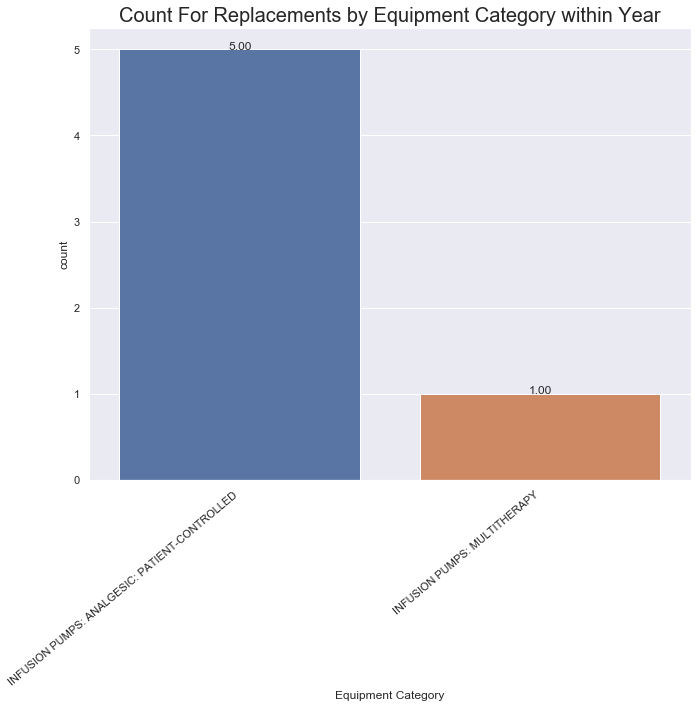

In [33]:
Replace_by_Equipment_category(0,1, "Count For Replacements by Equipment Category within Year")

There are 6 items that need to be replaced.


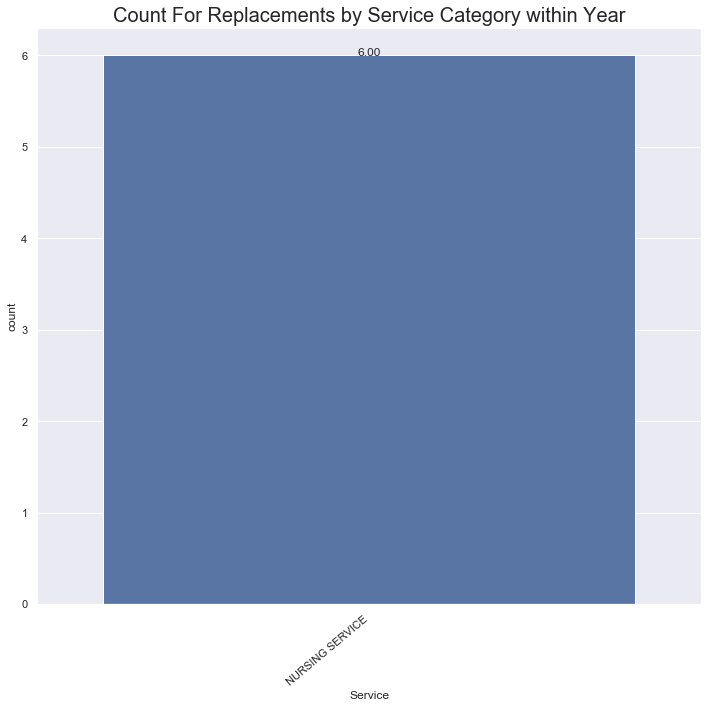

In [34]:
Replace_by_Service(0,1,"Count For Replacements by Service Category within Year")

## Replace In Five Years



The total cost for the service BIOMED is 0.0
The total cost for the service SURGERY is 3307.02
The total cost for the service NURSING SERVICE is 389428.72
The total cost for the service ICU is 8205.94
Total amount that needs to be replaced is 400941.68


[0.0, 3307.02, 389428.72, 8205.94]

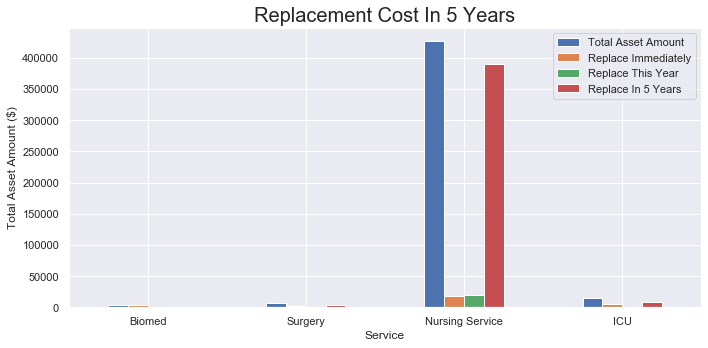

In [35]:
year_replacement_cost(5, 6, asset_df, "Replace In 5 Years", "Replacement Cost In 5 Years")    

There are 238 items that need to be replaced.


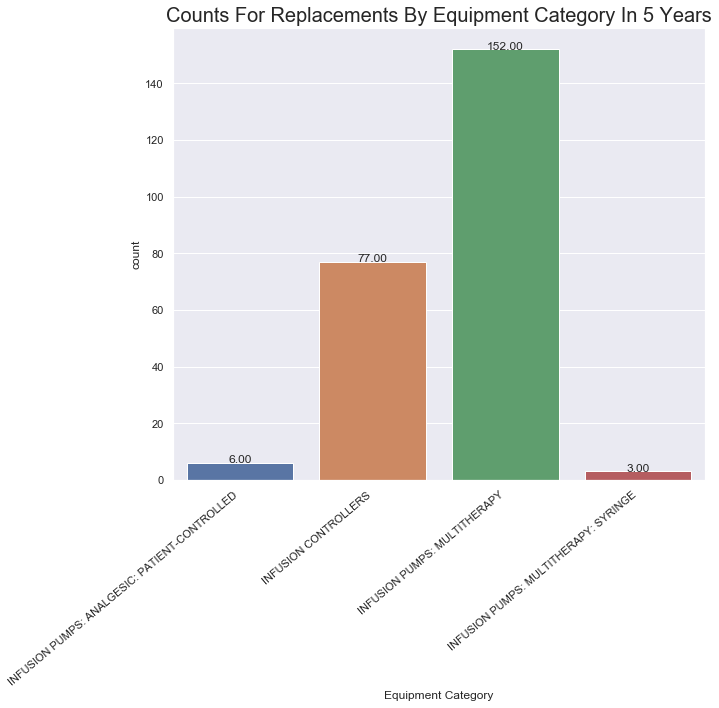

In [36]:
Replace_by_Equipment_category(5,6, "Counts For Replacements By Equipment Category In 5 Years")

## Replace in two years

The total cost for the service BIOMED is 0.0
The total cost for the service SURGERY is 0.0
The total cost for the service NURSING SERVICE is 0.0
The total cost for the service ICU is 0.0
Total amount that needs to be replaced is 0.0


[0.0, 0.0, 0.0, 0.0]

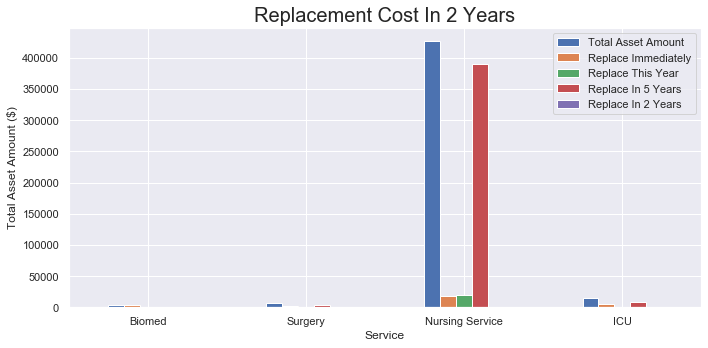

In [37]:
year_replacement_cost(2, 3, asset_df, "Replace In 2 Years", "Replacement Cost In 2 Years")   

# Replace Next Year


The total cost for the service BIOMED is 0.0
The total cost for the service SURGERY is 0.0
The total cost for the service NURSING SERVICE is 0.0
The total cost for the service ICU is 0.0
Total amount that needs to be replaced is 0.0


[0.0, 0.0, 0.0, 0.0]

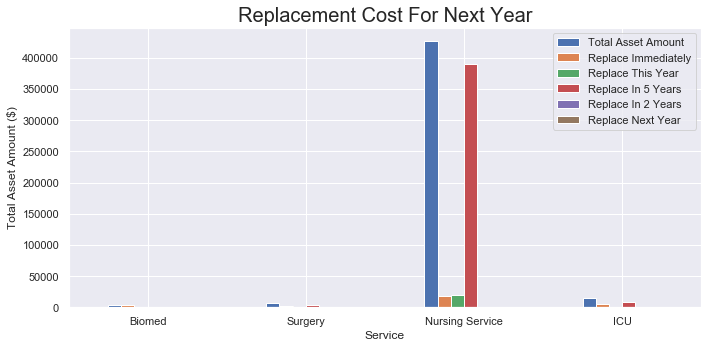

In [38]:
year_replacement_cost(1, 2, asset_df, "Replace Next Year", "Replacement Cost For Next Year")   

# Replace in Three


The total cost for the service BIOMED is 0.0
The total cost for the service SURGERY is 0.0
The total cost for the service NURSING SERVICE is 0.0
The total cost for the service ICU is 0.0
Total amount that needs to be replaced is 0.0


[0.0, 0.0, 0.0, 0.0]

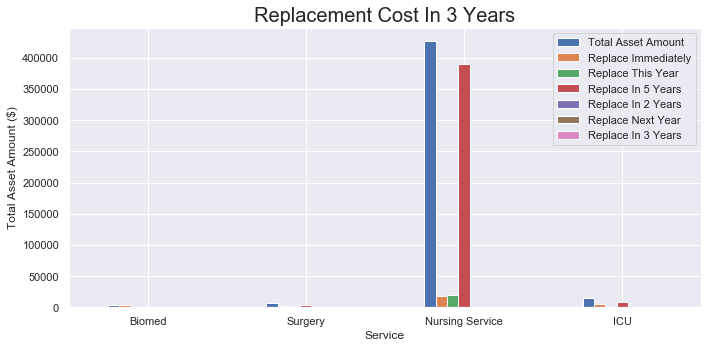

In [39]:
year_replacement_cost(3, 4, asset_df, "Replace In 3 Years", "Replacement Cost In 3 Years") 

# Replace in Four

The total cost for the service BIOMED is 0.0
The total cost for the service SURGERY is 0.0
The total cost for the service NURSING SERVICE is 0.0
The total cost for the service ICU is 0.0
Total amount that needs to be replaced is 0.0


[0.0, 0.0, 0.0, 0.0]

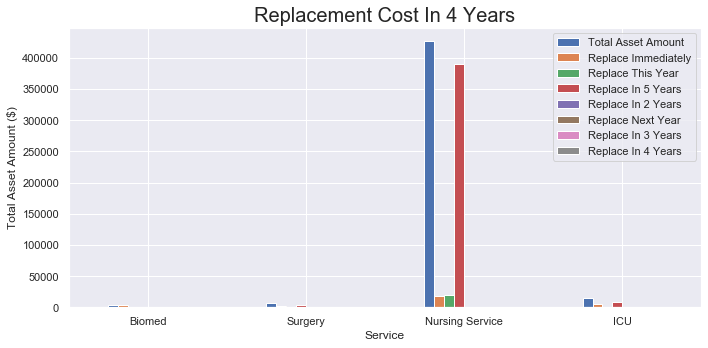

In [40]:
year_replacement_cost(11, 12, asset_df, "Replace In 4 Years", "Replacement Cost In 4 Years") 

There are 238 items that need to be replaced.


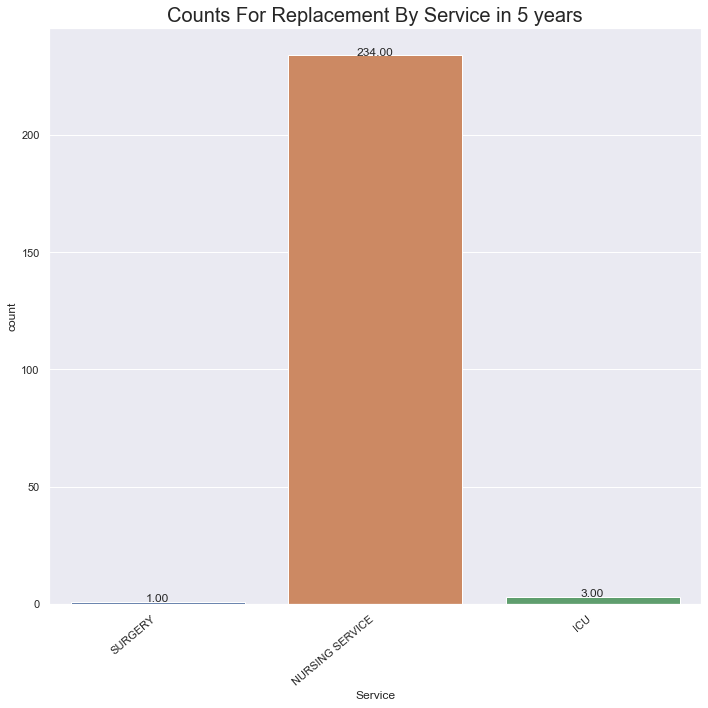

In [41]:
#What equipment needs to be replaced
Replace_by_Service(5,6,"Counts For Replacement By Service in 5 years")

There are 238 items that need to be replaced.


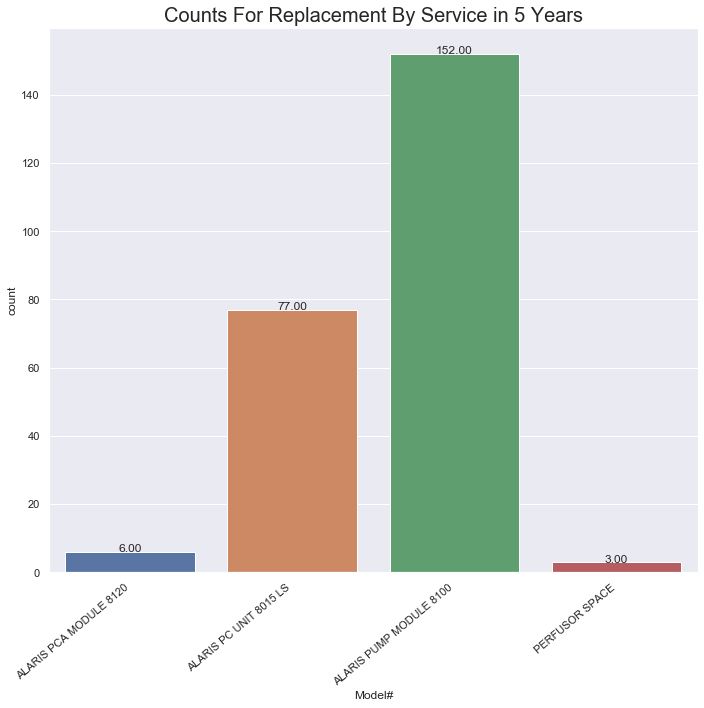

In [43]:
Replace_by_Model(5,6,"Counts For Replacement By Service in 5 Years")

There are 238 items that need to be replaced.


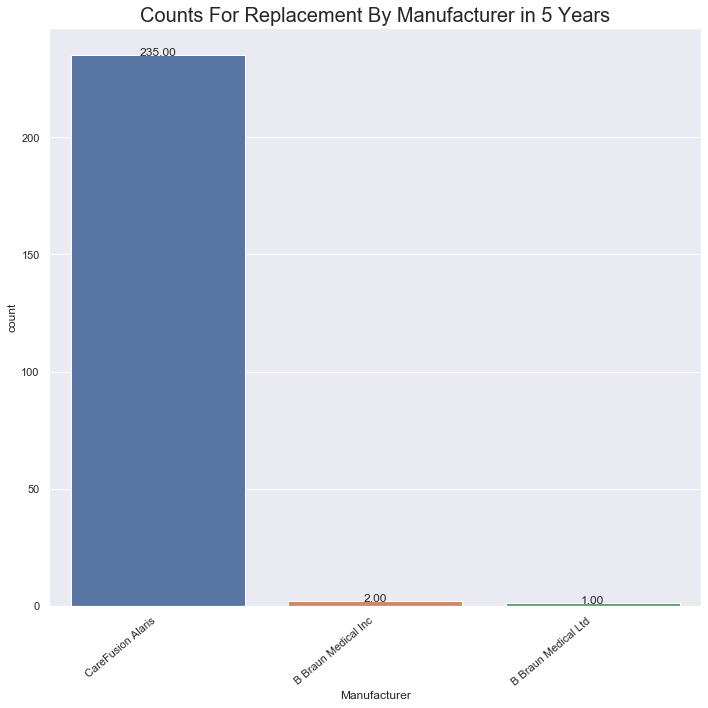

In [46]:
Replace_by_Man(5,6,"Counts For Replacement By Manufacturer in 5 Years")

In [ ]:
#What product do we have the most of.
#Look into to better alternatives that are cheaper and just as effective maybe. How close is it to the time allotted, like if it last
# for fifteen years and we are on the fifteenth year. Maybe it isn't so bad

In [ ]:
# breakdown for the next few years
# What device will cost us the most for the next years
# asset percentages, like how much is one thing
# Then which device is going to be replaced and cost us the most
# while it is a big amount of time, it has a lot of stuff, show graphs\


#How many you certain things will we have to buy